In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/sales_data.csv')

In [4]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index(df.columns[0], inplace = True)

<Axes: xlabel='Month'>

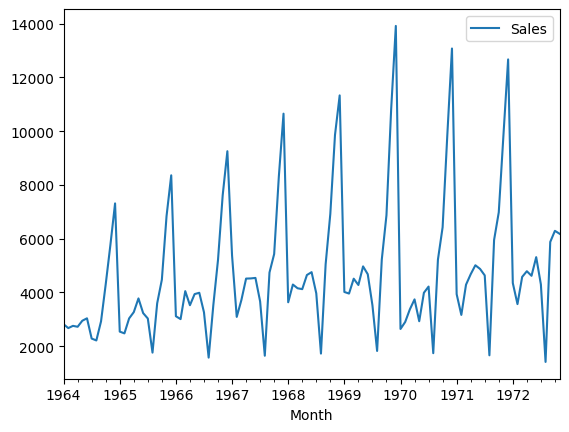

In [5]:
df.plot()

In [64]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()


from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])
future_dates_str = [date.strftime('%Y-%m-%d') for date in future_dates]
future_df['forecast'] = results.predict(start = 105, end = 130, dynamic= True)
future_df.iloc[107:130]
#future_df[['Sales', 'forecast']].plot(figsize=(16, 8))

C:\Users\prosa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prosa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Sales,forecast
1972-12-01,NaN,12824.945723
1973-01-01,NaN,4600.117154
1973-02-01,NaN,3724.594921
1973-03-01,NaN,4812.350842
1973-04-01,NaN,5046.395337
1973-05-01,NaN,5083.554845
1973-06-01,NaN,5505.313089
1973-07-01,NaN,4567.551511
1973-08-01,NaN,1656.373973
1973-09-01,NaN,6141.894284
